In [4]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import statsmodels.api as sm
from pandas.core import datetools

/home/sweksha/coursera/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
df = pandas.read_csv('train.csv')


In [6]:
def imputation(data):
    df_age= data['Age']
    mean_df = np.mean(df_age)
    data['Age'] = data['Age'].fillna(mean_df)
    return data

In [7]:
def features_normalize(features):
    ''' Feature Normalization When features differ by orders of magnitude,
    first performing feature scaling can make gradient descent converge 
    much more quickly'''
    sd = np.std(features, axis=0)
    mean = np.mean(features, axis=0)
    x_norm = (features - mean)/sd
    return x_norm

In [8]:
def compute_cost(features, values, theta):
    """
    Compute the cost of a list of parameters, theta, given a list of features 
    (input data points) and values (output data points).
    """
    m = len(values)
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2*m)

    return cost

In [9]:
def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    """

    m = len(values)
    cost_history = []
    for i in range(num_iterations):
        prediction_values = np.dot(features, theta)
        theta = theta - alpha/m * np.dot(np.transpose(features), (prediction_values-values))
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    return theta, pandas.Series(cost_history)


In [10]:
def compute_r_squared(data, predictions):
    # Calculates the coefficient of determination, R^2, for the model that produced 

    mean = np.mean(data)
    sum_of_square_errors = np.square(data - predictions).sum()
    sum_of_square_data =  np.square(data - mean).sum()
    r_squared = 1- sum_of_square_errors/sum_of_square_data
    return r_squared

In [11]:
def prediction_grad_dic(dfa):
    df = imputation(dfa)
    
    # Select Features (try different features!)
    features = df[['Pclass', 'Age', 'SibSp', 'Parch']]
    
    
    # Add date to features using dummy variables
    dummy_units = pandas.get_dummies(df['Sex'], prefix='sex')
    features = features.join(dummy_units)
    #print dummy_units
    # Values
    values = df['Survived']
    m = len(values)
     
    features = features_normalize(features)
    add_col = features.insert(0, 'x0', 1)
#    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.05 # please feel free to change this value
    num_iterations = 100 # please feel free to change this value
    
    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
 
    
    predictions = np.dot(features_array, theta_gradient_descent)
    r_squared = compute_r_squared(values_array, predictions)
    data_pred = pandas.DataFrame(data = predictions)
    feature_array = pandas.DataFrame(data = features_array)
    y = data_pred.round(decimals=0)
    x = y.astype(int)
    return x, theta_gradient_descent, cost_history

In [12]:
def plot_cost_history(df):
    alpha = 0.05 # please feel free to change this value
    x, theta_gradient_descent, cost_history = prediction_grad_dic(df)
    cost_df = pandas.DataFrame({
        'Cost_History': cost_history,
        'Iteration': range(len(cost_history))})
    plt.figure()
    plt.plot(cost_df['Cost_History'], cost_df['Iteration'])
   
    plt.title('Cost_History vs. Iteration for alpha = %.3f' % alpha)
    plt.xlabel('Iteration')
    plt.ylabel('Cost_History')   
    plt.show()


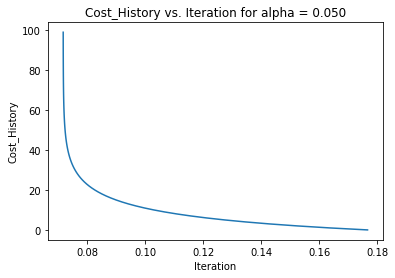

In [13]:


plot_cost_history(df)



In [14]:
prediction_grad_dic(df)

(     0
 0    0
 1    1
 2    1
 3    1
 4    0
 5    0
 6    0
 7    0
 8    1
 9    1
 10   1
 11   1
 12   0
 13   0
 14   1
 15   1
 16   0
 17   0
 18   1
 19   1
 20   0
 21   0
 22   1
 23   0
 24   1
 25   0
 26   0
 27   0
 28   1
 29   0
 ..  ..
 861  0
 862  1
 863  0
 864  0
 865  1
 866  1
 867  0
 868  0
 869  0
 870  0
 871  1
 872  0
 873  0
 874  1
 875  1
 876  0
 877  0
 878  0
 879  1
 880  1
 881  0
 882  1
 883  0
 884  0
 885  0
 886  0
 887  1
 888  1
 889  0
 890  0
 
 [891 rows x 1 columns],
 array([ 0.38156586, -0.14968291, -0.07241564, -0.04405117, -0.01244011,
         0.12338551, -0.12338551]),
 0     0.176673
 1     0.163653
 2     0.152491
 3     0.142883
 4     0.134582
 5     0.127384
 6     0.121122
 7     0.115656
 8     0.110869
 9     0.106665
 10    0.102963
 11    0.099695
 12    0.096803
 13    0.094238
 14    0.091958
 15    0.089929
 16    0.088119
 17    0.086502
 18    0.085055
 19    0.083760
 20    0.082597
 21    0.081554
 22    0.080616


In [15]:
def data_predict(dfa):
    global df
    data = imputation(dfa)
    features = data[['Pclass', 'Age', 'SibSp', 'Parch']]
    dummy_units = pandas.get_dummies(data['Sex'], prefix='sex')
    features = features.join(dummy_units)
    features = features_normalize(features)
    add_col = features.insert(0, 'x0', 1)
    features_array = np.array(features)
    x, theta_gradient_descent, cost_history = prediction_grad_dic(df)
    predictions = np.dot(features_array, theta_gradient_descent)
    data_pred = pandas.DataFrame(data = predictions)
    y = data_pred.round(decimals=0)
    x = y.astype(int)
    p = pandas.DataFrame(data['PassengerId'])
    p.insert(1,'Survived',x)
    return p                          


In [17]:
data = pandas.read_csv('test.csv')

In [18]:
data_rev = data_predict(data)

In [19]:


data_rev.to_csv('predict_test_titanic.csv', index = False)



In [20]:
data_rev


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
